In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import factor_analyzer






In [2]:
df = pd.read_csv("../data/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df = df.drop(columns=['id'])
df['Amount_log'] = np.log1p(df['Amount'])

In [4]:
# First split: separate test set (80-20 split)
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [5]:
# Print the shapes of resulting splits
print("Full dataset shape:", X.shape)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Full dataset shape: (568630, 30)
Training set shape: (454904, 30)
Test set shape: (113726, 30)


In [6]:
# Scale the features
scaler = StandardScaler()
cols_to_scale = ['Amount', 'Amount_log']

# Fit and transform training data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
# Transform test data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [ ]:
#Train PCA to decide number of components
X_train_pca = factor_analyzer.FactorAnalyzer(n_factors=30,
                                          rotation=None,
                                          method='principal').fit(X_train)

In [8]:
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squares Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)


In [10]:
get_loadings_communalities(X_train_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
q1,0.722,0.059,0.031,0.002,0.119,0.112,0.015,0.010,0.104,-0.120,...,-0.075,-0.067,0.052,0.035,0.030,0.065,0.009,-0.022,0.000,-0.004
q2,-0.734,-0.081,-0.165,-0.006,0.123,-0.347,0.048,0.059,0.015,0.118,...,0.010,-0.124,0.124,0.183,0.095,0.080,0.096,-0.024,-0.001,0.044
q3,0.811,-0.031,0.084,-0.000,-0.173,0.038,-0.001,0.105,-0.001,-0.033,...,-0.174,-0.084,0.042,0.048,-0.023,0.063,0.003,-0.039,0.001,-0.001
q4,-0.793,0.005,-0.128,0.001,0.242,0.118,0.023,-0.136,0.077,0.027,...,0.361,0.052,-0.054,0.021,0.010,-0.012,-0.034,0.042,-0.000,0.017
q5,0.698,0.157,-0.077,0.002,0.248,0.307,-0.099,-0.183,0.115,-0.142,...,0.124,-0.005,0.132,-0.001,0.069,0.112,0.125,-0.077,-0.000,0.046
q6,0.587,-0.268,-0.417,-0.017,-0.282,-0.001,0.141,0.170,-0.065,0.003,...,0.100,0.061,0.077,-0.190,0.037,0.059,0.048,-0.059,0.000,-0.003
q7,0.791,0.143,0.091,0.007,0.035,0.187,-0.004,-0.006,-0.005,0.000,...,0.032,-0.002,-0.007,0.246,0.079,0.029,0.041,-0.002,-0.001,0.016
q8,-0.356,0.340,0.729,0.025,0.110,-0.167,-0.013,0.059,-0.039,0.063,...,0.035,0.060,0.122,-0.192,0.076,0.104,0.082,-0.081,0.001,-0.009
q9,0.791,0.144,0.053,-0.002,-0.207,-0.068,-0.022,0.038,-0.083,-0.096,...,0.064,0.018,-0.184,-0.032,-0.016,0.043,0.091,-0.027,-0.001,0.040
q10,0.863,0.087,0.093,0.001,-0.100,-0.021,0.012,0.095,-0.015,-0.022,...,0.139,-0.054,0.320,0.019,-0.064,-0.163,-0.135,0.037,0.001,-0.033


In [11]:
get_summary(X_train_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Sum of Squares Loadings,9.82,2.81,1.92,1.88,1.84,1.29,1.07,1.00,0.87,0.82,...,0.28,0.25,0.24,0.22,0.20,0.19,0.18,0.17,0.12,0.11
Proportion of Variance Explained,0.33,0.09,0.06,0.06,0.06,0.04,0.04,0.03,0.03,0.03,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00
Cumulative Proportion,0.33,0.42,0.48,0.55,0.61,0.65,0.69,0.72,0.75,0.78,...,0.94,0.95,0.96,0.97,0.97,0.98,0.99,0.99,1.00,1.00


Text(0, 0.5, 'Variance')

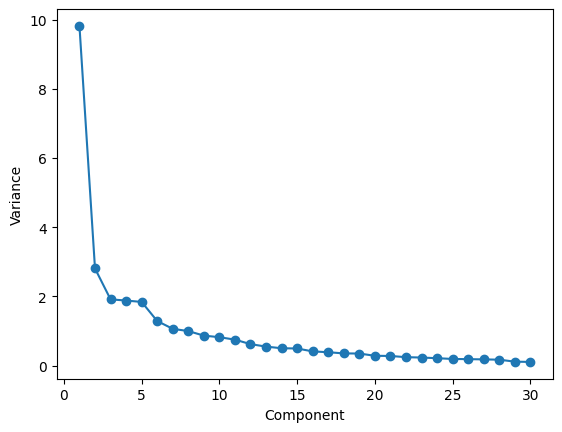

In [12]:
# Plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(X_train_pca.get_factor_variance()[0])),
         X_train_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

In [ ]:
#New PCA with chosen number of components and rotation
X_train_pca = factor_analyzer.FactorAnalyzer(n_factors=10,
                                          rotation='varimax',
                                          method='principal').fit(X_train)

In [ ]:
# Apply PCA transformation to training and test sets
X_train = X_train_pca.transform(X_train)
X_test = X_train_pca.transform(X_test)  

In [17]:
X_train.shape, X_test.shape

((454904, 10), (113726, 10))